In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Import data
df_train = pd.read_csv ('/kaggle/input/nlp-getting-started/train.csv')
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_train.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# **EDA**

**Checking for missing value**[](http://)

In [3]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
df_test.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

**Handling missing value**[](http://)

In [5]:

for df in [df_train, df_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')
df_train

,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1
7609,10870,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1


**Balanced/Imbalanced**[](http://)

We reach that classes are almost equally separated .

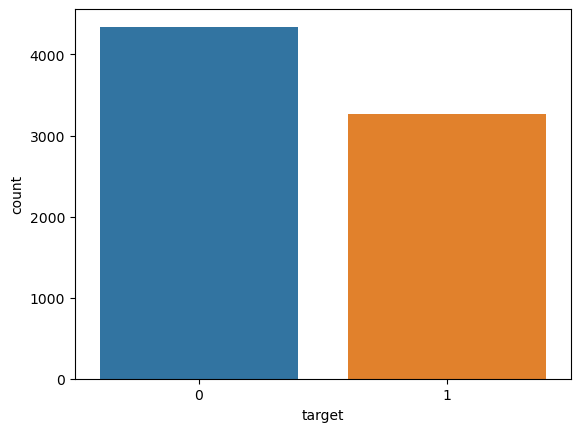

In [6]:
#df_train.target.hist()
#df_test.target.hist()
sns.countplot(x='target', data=df_train)
plt.show()


**Discover trend of dataset**[](http://)

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


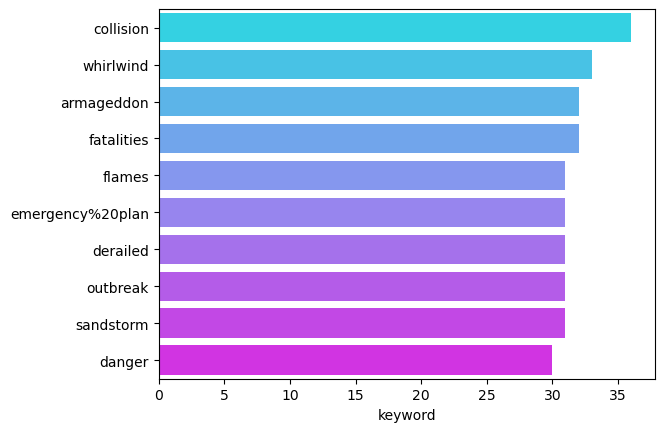

In [7]:
special_indices = df_train[(df_train['location'] == 'no_location')|(df_train['keyword'] == 'no_keyword')].index
df_train_clean = df_train.drop(special_indices)

#the top 10 most frequent values in the 'keyword' column
sns.barplot(y=df_train_clean['keyword'].value_counts()[:10].index,x=df_train_clean['keyword'].value_counts()[:10],
            orient='h',palette='cool')
df_train_clean

<Axes: xlabel='location'>

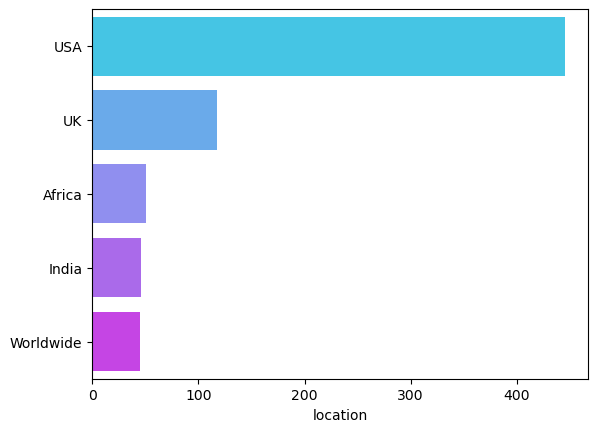

In [8]:
# Replacing the ambigious locations name with Standard names
df_train_clean['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)
#the top 5 most frequent values in the 'location' column
sns.barplot(y=df_train_clean['location'].value_counts()[:5].index,x=df_train_clean['location'].value_counts()[:5],
            orient='h',palette='cool')

# **Preprocessing**[](http://)

**Difference between EDA and preprocessing :**

* EDA : is the initial step in data analysis where you explore and understand the dataset
* Preprocessing : The steps required to go from raw data to a fprmat suitable to input to ypur ML model

**Text Preprocessing:**
* Text cleaning: remove unnecessary characters, HTML tags, special symbols
* Stop words removal: common words that don't carry much information
* Normalization: convert all words to lowercase to ensure consistency
* Stemming or Lemmatization: reduce words to their root
* Tokenization: split the text into individual words or tokens

In [9]:
# Applying a first round of text cleaning techniques

def clean_text(tweet):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    ## Use re.sub to replace matched characters with an empty string
    #cleaned_text = re.sub(pattern, '', text)
    tweet = tweet.lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub('ûó', '', tweet)
    
    # Special characters
    
    tweet = re.sub(r"ûª", "", tweet)
    tweet = re.sub(r"ûòåê", "", tweet)
    tweet = re.sub(r"ûò", "", tweet)
    tweet = re.sub(r"aaa", "a", tweet)
    tweet = re.sub(r"ûï", "", tweet)
    tweet = re.sub(r"aa", "a", tweet)
    tweet = re.sub(r"aaallll", "al", tweet)
    tweet = re.sub(r"ûòthe", "the", tweet)
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet) 
    return tweet

# Remove emoji
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)


# Applying the cleaning function to both test and training datasets
df_train['text'] = df_train['text'].apply(lambda x: clean_text(x))
df_test['text'] = df_test['text'].apply(lambda x: clean_text(x))
df_train['text'] = df_train['text'].apply(lambda x: remove_emoji(x))
df_test['text'] = df_test['text'].apply(lambda x: remove_emoji(x))
df_train

,id,keyword,location,text,target
0,1,no_keyword,no_location,our deeds are the reason of this earthquake ma...,1
1,4,no_keyword,no_location,forest fire near la ronge sask canada,1
2,5,no_keyword,no_location,all residents asked to shelter in place are be...,1
3,6,no_keyword,no_location,people receive wildfires evacuation orders in...,1
4,7,no_keyword,no_location,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,no_keyword,no_location,two giant cranes holding a bridge collapse int...,1
7609,10870,no_keyword,no_location,ariahrary thetawniest the out of control wild ...,1
7610,10871,no_keyword,no_location,s of volcano hawaii,1
7611,10872,no_keyword,no_location,police investigating after an ebike collided w...,1


**Tokenization:**
* Whitespace Tokenization: This is the simplest form of tokenization, where the text is split based on whitespace characters (space, tab, newline)
* Word Tokenization (using NLTK): The NLTK library in Python provides a word tokenizer that can handle more complex tokenization cases, such as handling punctuation, contractions, and hyphenated words
* Subword Tokenization (using BPE or SentencePiece): Subword tokenization is useful for languages with complex word formation or for handling out-of-vocabulary (OOV) words. Byte Pair Encoding (BPE) and SentencePiece are popular subword tokenization algorithms.

**Remove stop words**
* Using NLTK (Natural Language Toolkit)
* Using spaCy

In [10]:

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from pandas.core import apply

def preprocessing (text):
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Apply stemming to each word
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in words]
    
    # Join stemmed words back into a single string
    processed_text = ' '.join(stemmed_words)
    
    return processed_text

df_train['text'] = df_train['text'].apply(lambda x: preprocessing(x))
df_test['text'] = df_test['text'].apply(lambda x: preprocessing(x))
df_train


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,keyword,location,text,target
0,1,no_keyword,no_location,deed reason earthquak may allah forgiv us,1
1,4,no_keyword,no_location,forest fire near la rong sask canada,1
2,5,no_keyword,no_location,resid ask shelter place notifi offic evacu she...,1
3,6,no_keyword,no_location,peopl receiv wildfir evacu order california,1
4,7,no_keyword,no_location,got sent photo rubi alaska smoke wildfir pour ...,1
...,...,...,...,...,...
7608,10869,no_keyword,no_location,two giant crane hold bridg collaps nearbi home,1
7609,10870,no_keyword,no_location,ariahrari thetawniest control wild fire califo...,1
7610,10871,no_keyword,no_location,volcano hawaii,1
7611,10872,no_keyword,no_location,polic investig ebik collid car littl portug eb...,1


# **Feature Extractions:**
 Transform the processed text data into numerical features that can be used by ML model
 Some common techniques for text feature extraction:
*  **Bag of Words (BoW)**: In this approach, a document is represented as a vector where each element corresponds to the count of a particular word in the document. Stop words (common words like "the," "and," "is") are often removed, and the resulting vector captures the frequency of words in the document. The order of words is not considered in this method.
* **Term Frequency-Inverse Document Frequency (TF-IDF)**: This method considers the importance of words in a document relative to their frequency in the entire corpus. Words that appear frequently in a specific document but infrequently across the corpus are assigned higher weights. This helps in capturing the significance of words within a document.
* **Word Embeddings**: Word embeddings are dense vector representations of words that capture semantic relationships between words. Techniques like Word2Vec, GloVe, and FastText learn embeddings by considering the context of words in a large corpus. These embeddings can be used as features for downstream tasks.
* **Word n-grams**: Instead of representing single words, n-grams capture sequences of n words. This helps in preserving some contextual information. For example, bigrams (2-word sequences) or trigrams (3-word sequences) can be used.
* **Pretrained Language Models**: Advanced models like GPT, BERT, and their variants learn contextualized representations of words and sentences. These models can be fine-tuned for specific tasks or used to extract features that capture rich semantic information.



In [11]:
#BOW
#There is a lot of parameters for preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow = CountVectorizer()
bow_train = bow.fit_transform(df_train['text'])
bow_test = bow.transform(df_test["text"])
#print((bow.vocabulary_))
#print(bow.get_feature_names_out())
print(bow_train.shape)
print(bow_test.shape)
# Keeping only non-zero elements to preserve space 
print(bow_train[0].todense())

#TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(df_train['text'])
test_tfidf = tfidf.transform(df_test["text"])
#print((tfidf.vocabulary_))
#print(bow.get_feature_names_out())
print(train_tfidf.shape)
print(test_tfidf.shape)
print(train_tfidf[0].todense())


(7613, 13448)
(7613, 13448)
[[0 0 0 ... 0 0 0]]
(7613, 58170)
(7613, 58170)
[[0. 0. 0. ... 0. 0. 0.]]


# **Model selection**

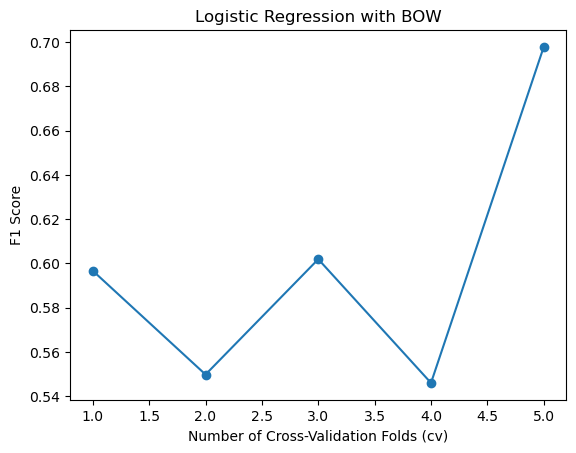

Mean f1: 0.598398051191276


LogisticRegression()

In [12]:
#Logistic Regression with BOW
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
clf = LogisticRegression()
# Perform 5-fold cross-validation and use accuracy as the scoring metric
scores = model_selection.cross_val_score(clf, bow_train , df_train["target"], cv=5, scoring="f1")
cv_values = range(1, len(scores) + 1)  # x-axis: cv
score_values = scores  # y-axis: scores
plt.plot(cv_values, score_values, marker='o')
plt.xlabel('Number of Cross-Validation Folds (cv)')
plt.ylabel('F1 Score')
plt.title('Logistic Regression with BOW')
plt.show()
print("Mean f1:", scores.mean())
clf.fit(bow_train, df_train["target"])




Model selection
model train
evaluation

In [13]:
'''
def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
    '''

'\ndef metrics(pred_tag, y_test):\n    print("F1-score: ", f1_score(pred_tag, y_test))\n    print("Precision: ", precision_score(pred_tag, y_test))\n    print("Recall: ", recall_score(pred_tag, y_test))\n    print("Acuracy: ", accuracy_score(pred_tag, y_test))\n    print("-"*50)\n    print(classification_report(pred_tag, y_test))\n    '

In [14]:
'''
x_test_cv = v.transform(x_test)
y_pred = model.predict(x_test_cv)
from  sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
'''

'\nx_test_cv = v.transform(x_test)\ny_pred = model.predict(x_test_cv)\nfrom  sklearn.metrics import classification_report\nprint(classification_report(y_test,y_pred))\n'